In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("OptimizedDataset.csv")

In [3]:
df.head()

,Number,IaL12,IbL12,IcL12,Ia13,Ib13,Ic13,Ia23,Ib23,Ic23,...,Vb25,Vc25,Va34,Vb34,Vc34,Va45,Vb45,Vc45,Type of Fault,Fault Location
0,0.160758,-5492.28660,6258.3010,-767.0721,-6508.69200,8058.9500,-1550.2580,-2153.56000,3078.16770,-924.60767,...,7990.522000,-1876.3536,493.72815,-429.371280,-64.35689,-6114.168500,7990.522000,-1876.3536,No fault,No fault
1,0.505802,5485.93800,773.8655,-6259.8140,7211.04200,376.5860,-7587.6280,2840.45260,-223.27785,-2617.17480,...,0.158811,-7237.5684,-346.19644,-182.290310,528.48676,7237.409700,0.158811,-7237.5684,No fault,No fault
2,0.791913,32998.26600,-8657.6350,-24655.5980,-376.31598,7587.5034,-7211.1880,223.26718,2617.05880,-2840.32620,...,7237.398400,-7237.3765,182.31421,-528.501460,346.18732,-0.021847,7237.398400,-7237.3765,No fault,No fault
3,0.413468,-6324.02000,938.6665,5385.6100,-8128.74900,1762.3964,6366.3525,-3095.16360,1000.79095,2094.37280,...,2081.242400,5968.9023,437.37125,50.849632,-488.22090,-8050.144500,2081.242400,5968.9023,No fault,No fault
4,0.983131,-386.44016,-5711.7837,6095.8220,-1069.32690,-6813.7330,7883.0596,-751.60190,-2281.43040,3033.03220,...,-6428.433000,7838.4040,-94.59090,504.986400,-410.39548,-1409.970800,-6428.433000,7838.4040,No fault,No fault


In [4]:
columns = list(df)

In [5]:
X = df.drop(["Type of Fault","Fault Location"],axis = "columns")
Y1 = df["Type of Fault"]
Y2 = df["Fault Location"]

In [6]:
X.shape

(115785, 43)

In [7]:
for i in range(1,22):
    print(columns[i]," ",columns[i+21])
#Preparing to Add a new Feature P = VI

IaL12   Va12
IbL12   Vb12
IcL12   Vc12
Ia13   Va13
Ib13   Vb13
Ic13   Vc13
Ia23   Va23
Ib23   Vb23
Ic23   Vc23
Ia24   Va24
Ib24   Vb24
Ic24   Vc24
Ia25   Va25
Ib25   Vb25
Ic25   Vc25
Ia34   Va34
Ib34   Vb34
Ic34   Vc34
Ia45   Va45
Ib45   Vb45
Ic45   Vc45


In [8]:
c = 'a'
k = 0
for i in range(1,22):
    name = "P"+chr(ord(c)+k%3)+columns[i][-1:-3:-1][::-1]
    P = df[columns[i]]*df[columns[i+21]]
    new_series = pd.Series(P,name=name)
    X[name] = new_series
    k = k+1

In [10]:
c = 'a'
k = 0;
for i in range(1,22):
    name = "Z"+chr(ord(c)+k%3)+columns[i][-1:-3:-1][::-1]
    Z = df[columns[i+21]]/df[columns[i]]
    new_series = pd.Series(Z,name=name)
    X[name] = new_series
    k = k+1

In [11]:
X

,Number,IaL12,IbL12,IcL12,Ia13,Ib13,Ic13,Ia23,Ib23,Ic23,...,Zc24,Za25,Zb25,Zc25,Za34,Zb34,Zc34,Za45,Zb45,Zc45
0,0.160758,-5492.28660,6258.3010,-767.07210,-6508.69200,8058.9500,-1550.25800,-2153.56000,3078.16770,-924.60767,...,0.047912,5.761253e+00,3.967723,1.969668,-0.080271,-0.053800,0.035165,4.767788e+00,3.574022,1.968207
1,0.505802,5485.93800,773.8655,-6259.81400,7211.04200,376.5860,-7587.62800,2840.45260,-223.27785,-2617.17480,...,0.196652,3.714553e+00,-0.000300,5.101612,-0.047967,-3.744160,-0.072734,3.388262e+00,-0.000336,4.352090
2,0.791913,32998.26600,-8657.6350,-24655.59800,-376.31598,7587.5034,-7211.18800,223.26718,2617.05880,-2840.32620,...,0.162507,-4.123687e-05,5.101594,3.714414,-3.754931,-0.072738,-0.047966,-4.617924e-05,4.352070,3.388161
3,0.413468,-6324.02000,938.6665,5385.61000,-8128.74900,1762.3964,6366.35250,-3095.16360,1000.79095,2094.37280,...,0.208461,3.995517e+00,2.087221,5.865331,-0.054388,0.024982,-0.081285,3.594155e+00,2.072291,4.831288
4,0.983131,-386.44016,-5711.7837,6095.82200,-1069.32690,-6813.7330,7883.05960,-751.60190,-2281.43040,3033.03220,...,0.168707,1.658617e+00,5.556874,3.905665,0.069402,-0.078133,-0.052439,1.686043e+00,4.641673,3.528907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115780,0.017296,1743.21250,-6587.3420,4844.10350,1599.53530,-8075.5933,6476.05600,232.39720,-2844.58840,-21775.24000,...,-37.083825,-4.895999e+00,4.823201,0.511841,-0.202352,-0.068906,12.235284,-7.834789e+00,4.168779,0.550220
115781,0.869536,6090.85550,-5713.7676,-377.25632,7344.29300,-7467.2150,122.92225,2509.43040,-2916.40380,406.97336,...,-0.380961,5.238667e+00,3.781880,0.760205,-0.074465,-0.049597,0.346483,4.440586e+00,3.438141,0.813429
115782,0.144692,-6261.96700,5485.0835,776.88324,-7588.74500,7209.7397,379.00540,-2617.89090,2840.19530,-222.30463,...,5.015718,5.101389e+00,3.714407,-0.004901,-0.072728,-0.047960,-3.568733,4.351948e+00,3.388160,-0.005490
115783,0.458580,565947.30000,-281701.4700,-284150.72000,-376.87310,7587.7534,-7210.88040,222.90591,2617.38550,-2840.29130,...,0.162495,-2.104068e-11,5.101488,3.714378,-3.757802,-0.072743,-0.047970,-2.356336e-11,4.352002,3.388164


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled

,Number,IaL12,IbL12,IcL12,Ia13,Ib13,Ic13,Ia23,Ib23,Ic23,...,Pc24,Pa25,Pb25,Pc25,Pa34,Pb34,Pc34,Pa45,Pb45,Pc45
0,-0.970623,-0.002570,0.003103,-0.000660,-1.100141,1.348253,-0.257603,-0.140027,0.143163,-0.041303,...,-0.017310,-0.056716,0.058699,-0.025288,-0.027849,-0.009363,0.007424,-0.047638,0.064047,-0.053137
1,0.162627,0.018703,-0.007293,-0.011692,1.176601,0.082939,-1.256836,0.180344,-0.005584,-0.111148,...,0.021928,0.328092,-0.044520,0.018885,-0.002974,0.009373,-0.012376,0.277829,-0.076684,0.018830
2,1.102317,0.072015,-0.025170,-0.048638,-0.082495,1.270604,-1.194532,0.012449,0.122388,-0.120357,...,0.014568,-0.384713,0.021338,0.038855,0.112102,-0.011629,-0.005665,-0.382598,0.018129,0.042873
3,-0.140631,-0.004182,-0.006980,0.011697,-1.368984,0.311187,1.052660,-0.200431,0.049567,0.083278,...,0.010943,0.435158,-0.031208,-0.002958,-0.050054,0.009989,-0.007835,0.387677,-0.060217,-0.013910
4,1.730343,0.007323,-0.019586,0.013123,-0.197497,-1.101333,1.303687,-0.050090,-0.098315,0.122012,...,0.021739,-0.324125,0.003181,0.047342,0.118469,-0.008470,-0.009233,-0.332226,-0.006549,0.056575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115780,-1.441803,0.011450,-0.021246,0.010609,0.245391,-1.309166,1.070817,0.013035,-0.123688,-0.901722,...,-0.034208,-0.399585,0.035620,0.255612,0.097923,-0.013473,0.013836,-0.390452,0.037191,0.298293
115781,1.357258,0.019875,-0.019590,0.000123,1.198713,-1.208964,0.019322,0.159109,-0.126923,0.013646,...,-0.018209,0.085558,0.050111,-0.032964,-0.056709,-0.005677,0.007171,0.086272,0.051156,-0.063640
115782,-1.023388,-0.004062,0.001637,0.002441,-1.279372,1.208385,0.061706,-0.169814,0.132441,-0.012322,...,-0.017875,0.134534,0.045907,-0.034605,-0.065023,-0.004269,0.006788,0.131804,0.045067,-0.065708
115783,0.007533,1.104740,-0.542727,-0.569805,-0.082587,1.270645,-1.194481,0.012426,0.122403,-0.120355,...,0.014568,-0.384713,0.021343,0.038861,0.112102,-0.011631,-0.005666,-0.382598,0.018136,0.042880


In [13]:
X_scaled.shape

(115785, 64)

In [14]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y1,test_size = 0.2,random_state=42)
X_test

,Number,IaL12,IbL12,IcL12,Ia13,Ib13,Ic13,Ia23,Ib23,Ic23,...,Pc24,Pa25,Pb25,Pc25,Pa34,Pb34,Pc34,Pa45,Pb45,Pc45
63601,-1.388845,0.008785,-0.020308,0.012379,-0.043279,-1.187274,1.236237,-1.409664,0.127669,0.789597,...,0.061532,-0.224426,-0.043700,-0.024046,0.356778,0.060368,-0.170975,-0.208169,-0.075367,-0.047455
3556,-1.427211,0.020451,-0.010829,-0.009757,1.338981,-0.301994,-1.031975,0.197661,2.479716,-2.398562,...,0.457074,0.440228,0.847686,-0.443669,-0.053920,0.223491,-0.190171,0.393445,0.783105,-0.484225
47504,-0.449012,0.019959,-0.019485,-0.000075,1.209025,-1.198982,-0.000993,0.160856,-0.126114,0.011780,...,-0.018159,0.097670,0.049138,-0.033419,-0.058844,-0.005335,0.007091,0.097558,0.049736,-0.064228
45462,-1.417780,0.009733,0.001562,-0.011777,0.256396,1.080244,-1.341238,1.575392,-0.964091,-0.130637,...,0.024262,6.372416,-0.803838,0.049579,-10.648770,2.888917,-0.010571,6.904132,-1.276796,0.060401
25913,-1.168584,0.010740,-0.021050,0.011131,0.168604,-1.281761,1.119862,0.002952,-0.119789,0.108756,...,0.010762,-0.397068,0.030260,0.033606,0.103223,-0.012260,-0.002477,-0.391067,0.030699,0.033575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111465,-0.640216,-0.838921,-0.982939,1.912811,-1.279188,1.208597,0.061309,-0.169769,0.132442,-0.012352,...,-0.017878,0.134331,0.045940,-0.034598,-0.064976,-0.004275,0.006791,0.131603,0.045110,-0.065700
82204,1.065779,-0.002599,-0.010161,0.013425,-1.220671,-0.033744,1.251355,-0.184559,0.015290,0.104461,...,0.021729,0.331318,-0.044366,0.018430,-0.004072,0.009418,-0.012302,0.281021,-0.076513,0.018159
82237,-0.667617,0.020181,-0.019183,-0.000625,1.236719,-1.169501,-0.058240,0.165577,-0.123720,0.006550,...,-0.017909,0.131252,0.046217,-0.034511,-0.064476,-0.004362,0.006819,0.128754,0.045510,-0.065595
113869,0.983373,0.019004,-0.007797,-0.011470,1.205723,0.027470,-1.230142,0.183701,-0.011159,-0.108201,...,0.020408,0.350784,-0.043240,0.015512,-0.010990,0.009672,-0.011787,0.300402,-0.075233,0.013834


In [76]:
import numpy as np
unique,count = np.unique(Y_train,return_counts=True)

In [77]:
dict_ = {k:v for k,v in zip(unique,count)}
dict_

{'DLG': 2796,
 'L-L': 2732,
 'L-L-L': 1166,
 'L-L-L-G': 808,
 'Line fault': 1272,
 'No fault': 81717,
 'SLG': 2137}

In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =42)

In [85]:
X_train_res,Y_train_res = sm.fit_resample(X_train,Y_train.ravel())
Y_train_res

array(['No fault', 'No fault', 'No fault', ..., 'SLG', 'SLG', 'SLG'],
      dtype=object)

In [20]:
unique1,count1 = np.unique(Y_train_res,return_counts=True)

In [21]:
dict1_ = {k:v for k,v in zip(unique1,count1)}

In [22]:
dict1_

{'DLG': 81717,
 'L-L': 81717,
 'L-L-L': 81717,
 'L-L-L-G': 81717,
 'Line fault': 81717,
 'No fault': 81717,
 'SLG': 81717}

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

In [24]:
rf_model.fit(X_train_res,Y_train_res)

RandomForestClassifier(n_estimators=50, random_state=42)

In [25]:
y_pred = rf_model.predict(X_test)

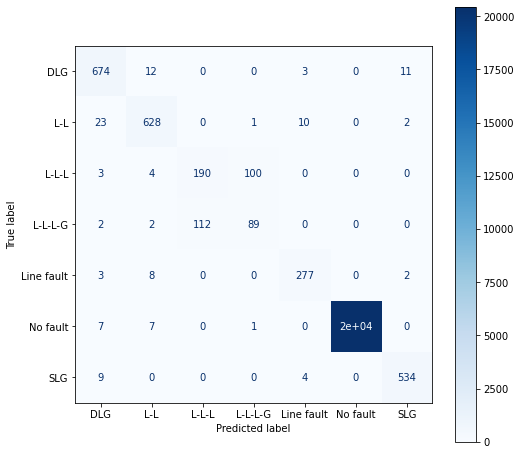

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred,labels=rf_model.classes_)
plt.figure(figsize=(8,8))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_model.classes_)
disp.plot(cmap="Blues",ax=plt.gca())
plt.show()

In [27]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         DLG       0.93      0.96      0.95       700
         L-L       0.95      0.95      0.95       664
       L-L-L       0.63      0.64      0.63       297
     L-L-L-G       0.47      0.43      0.45       205
  Line fault       0.94      0.96      0.95       290
    No fault       1.00      1.00      1.00     20454
         SLG       0.97      0.98      0.97       547

    accuracy                           0.99     23157
   macro avg       0.84      0.84      0.84     23157
weighted avg       0.99      0.99      0.99     23157



In [28]:
accuracy = accuracy_score(Y_test,y_pred)
accuracy

0.9859221833570843

In [29]:
X_test_res,Y_test_res = sm.fit_resample(X_test,Y_test.ravel())

In [30]:
y_pred_res = rf_model.predict(X_test_res)

In [31]:
cm = confusion_matrix(Y_test_res, y_pred_res,labels=rf_model.classes_)
print(cm)

[[19419   507    35    35    70     0   388]
 [  649 19345    15    49   269     0   127]
 [  408   300 12230  7504     8     0     4]
 [  608   363 10281  9201     0     1     0]
 [  176   415     4     0 19524     1   334]
 [    7     7     0     1     0 20439     0]
 [  528    25     0     0    37     3 19861]]


In [32]:
accuracy = accuracy_score(Y_test_res,y_pred_res)
accuracy

0.8382502898489992

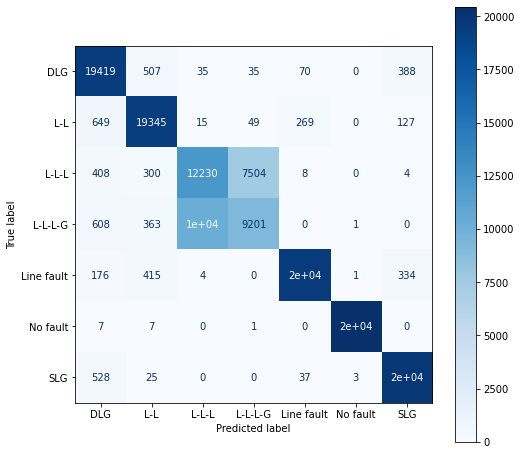

In [33]:

plt.figure(figsize=(8,8))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_model.classes_)
disp.plot(cmap="Blues",ax=plt.gca())
plt.show()

In [34]:
import matplotlib.pyplot as plt
import numpy as np
X_train_res.to_numpy()[1]

array([-0.89566486,  0.04396543, -0.0364618 , -0.00529615,  0.04257276,
       -1.22885448,  1.1923954 , -0.01621357, -0.11342039,  0.11405644,
       -0.00394999, -1.24495245,  1.25524568, -0.03940097, -0.0593408 ,
        0.07897834, -0.00394999, -1.24495245,  1.25524568, -0.03510565,
       -0.05788117,  0.08266934, -0.01239983, -1.24443361,  1.26304676,
       -0.08271106, -0.21748686,  0.22348288, -0.03724221, -1.21459064,
        1.25752773,  0.01637921, -0.04808282,  0.03936185, -0.01239983,
       -1.24443361,  1.26304676, -0.00441456,  0.02123036, -0.01822157,
       -0.01239983, -1.24443361,  1.26304676,  0.04598449,  0.08837706,
        0.0309279 , -0.81983347,  0.0679739 ,  0.07994406, -0.37024693,
        0.03708333,  0.0415908 , -0.2643618 ,  0.02430921,  0.01456869,
       -0.38471352,  0.02134304,  0.03885763,  0.11210144, -0.01162777,
       -0.00566323, -0.38259834,  0.0181344 ,  0.04287618])

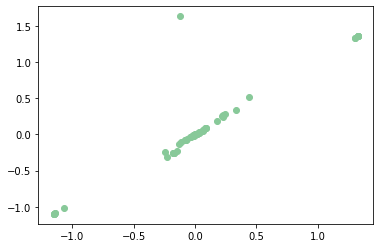

In [35]:
plt.scatter(X_train_res.to_numpy()[3],X_train_res.to_numpy()[24],color="#88c999")
plt.show()

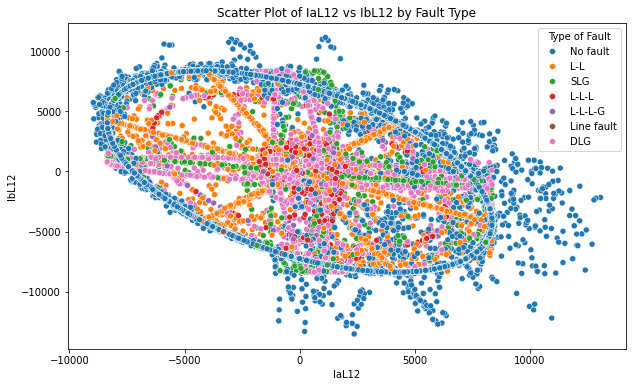

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Type of Fault' is the fault type column
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Va12', y='Vb12', hue='Type of Fault', data=df)
plt.title("Scatter Plot of IaL12 vs IbL12 by Fault Type")
plt.xlabel("IaL12")
plt.ylabel("IbL12")
plt.legend(title='Type of Fault')
plt.show()

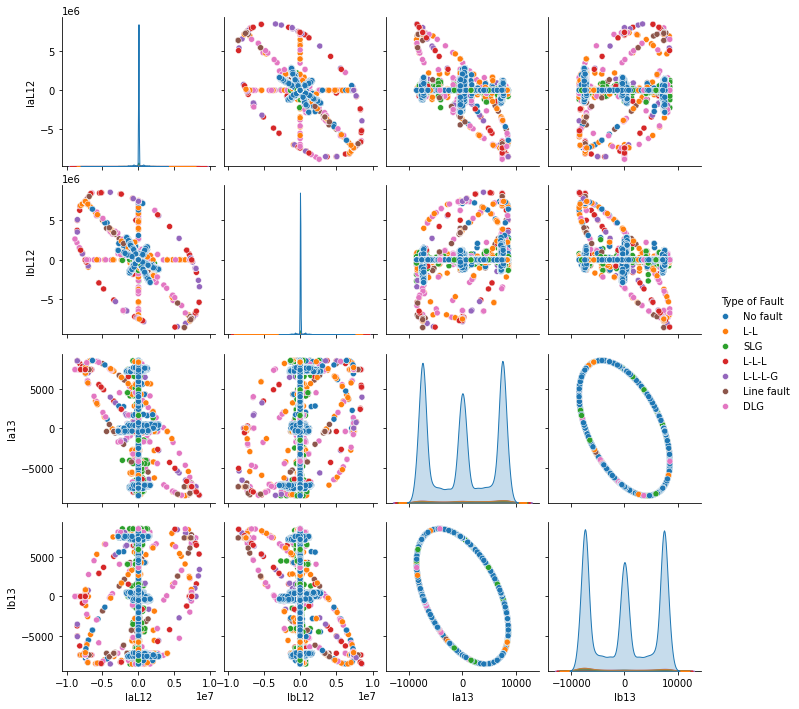

In [37]:
import seaborn as sns
# Select a subset of attributes or use all if manageable
subset_attributes = ['IaL12', 'IbL12', 'Ia13', 'Ib13', 'Type of Fault']  # Example subset
sns.pairplot(df[subset_attributes], hue='Type of Fault', diag_kind="kde")
plt.show()

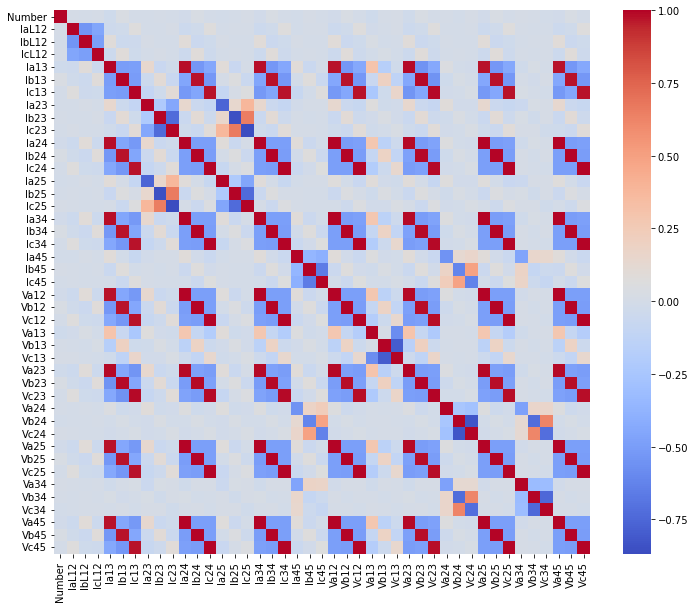

In [38]:
import seaborn as sns

plt.figure(figsize=(12, 10))
correlation_matrix = df.iloc[:, :-2].corr()  # Exclude 'Type of Fault' & 'Fault Location'
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'PCA of Current and Voltage Attributes')

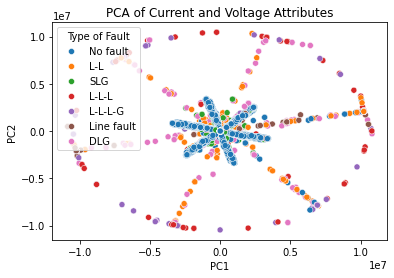

In [39]:
from sklearn.decomposition import PCA

# Standardize your data if necessary before applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.iloc[:, :-2])  # Exclude 'Type of Fault' & 'Fault Location'
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Type of Fault'] = df['Type of Fault']

sns.scatterplot(x='PC1', y='PC2', hue='Type of Fault', data=df_pca)
plt.title('PCA of Current and Voltage Attributes')


In [81]:
X_train_res['Type of fault']=Y_train_res

In [82]:
df = X_train_res
df

,Number,IaL12,IbL12,IcL12,Ia13,Ib13,Ic13,Ia23,Ib23,Ic23,...,Pa25,Pb25,Pc25,Pa34,Pb34,Pc34,Pa45,Pb45,Pc45,Type of fault
0,-1.488668,0.020219,-0.019163,-0.000687,1.239579,-1.166209,-0.064400,0.166193,-0.123509,0.005960,...,0.134789,0.045864,-0.034614,-0.065105,-0.004265,0.006785,0.132065,0.045012,-0.065718,No fault
1,-0.895665,0.043965,-0.036462,-0.005296,0.042573,-1.228854,1.192395,-0.016214,-0.113420,0.114056,...,-0.384714,0.021343,0.038858,0.112101,-0.011628,-0.005663,-0.382598,0.018134,0.042876,No fault
2,1.156335,0.007692,0.002611,-0.010754,0.035051,1.212533,-1.253413,0.029129,0.115386,-0.124674,...,-0.360600,0.012530,0.043528,0.116677,-0.010197,-0.007463,-0.363280,0.006213,0.050326,No fault
3,-0.119182,0.020726,-0.018189,-0.002245,1.306436,-1.071106,-0.226648,0.178039,-0.115425,-0.009063,...,0.226102,0.036163,-0.036117,-0.078097,-0.001431,0.005617,0.216048,0.031188,-0.067169,No fault
4,1.302979,0.020172,-0.019201,-0.000597,1.235343,-1.171067,-0.055294,0.165352,-0.123856,0.006820,...,0.129555,0.046374,-0.034462,-0.064223,-0.004415,0.006835,0.127186,0.045737,-0.065535,No fault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572014,-1.403066,0.012696,-0.021490,0.009577,0.381548,-1.344402,0.970427,0.033000,-0.167940,0.096522,...,-0.384032,0.064657,0.020577,0.083086,-0.178847,-0.000301,-0.371641,0.092427,0.014627,SLG
572015,-1.391654,0.000634,0.004148,-0.005087,-0.732921,1.428042,-0.704032,-0.083088,0.574171,-0.080406,...,-0.298379,0.010067,0.000062,0.040565,0.147099,0.004224,-0.282036,-0.235740,-0.016264,SLG
572016,-1.391842,0.004285,-0.017651,0.014227,-0.520270,-0.872048,1.395204,-1.537336,-0.072641,0.127074,...,1.593299,-0.020654,0.051494,-6.753837,-0.003005,-0.013072,1.769172,-0.039677,0.064410,SLG
572017,-1.341802,0.000919,0.004163,0.804549,-0.702742,1.429147,-0.735234,-0.078355,0.145470,-0.083096,...,-0.312961,0.057367,0.002195,0.045675,-0.014181,0.003855,-0.296539,0.065040,-0.013105,SLG


In [86]:
X_train_res

,Number,IaL12,IbL12,IcL12,Ia13,Ib13,Ic13,Ia23,Ib23,Ic23,...,Pc24,Pa25,Pb25,Pc25,Pa34,Pb34,Pc34,Pa45,Pb45,Pc45
0,-1.488668,0.020219,-0.019163,-0.000687,1.239579,-1.166209,-0.064400,0.166193,-0.123509,0.005960,...,-0.017872,0.134789,0.045864,-0.034614,-0.065105,-0.004265,0.006785,0.132065,0.045012,-0.065718
1,-0.895665,0.043965,-0.036462,-0.005296,0.042573,-1.228854,1.192395,-0.016214,-0.113420,0.114056,...,0.014569,-0.384714,0.021343,0.038858,0.112101,-0.011628,-0.005663,-0.382598,0.018134,0.042876
2,1.156335,0.007692,0.002611,-0.010754,0.035051,1.212533,-1.253413,0.029129,0.115386,-0.124674,...,0.018246,-0.360600,0.012530,0.043528,0.116677,-0.010197,-0.007463,-0.363280,0.006213,0.050326
3,-0.119182,0.020726,-0.018189,-0.002245,1.306436,-1.071106,-0.226648,0.178039,-0.115425,-0.009063,...,-0.016254,0.226102,0.036163,-0.036117,-0.078097,-0.001431,0.005617,0.216048,0.031188,-0.067169
4,1.302979,0.020172,-0.019201,-0.000597,1.235343,-1.171067,-0.055294,0.165352,-0.123856,0.006820,...,-0.017926,0.129555,0.046374,-0.034462,-0.064223,-0.004415,0.006835,0.127186,0.045737,-0.065535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572014,-1.403066,0.012696,-0.021490,0.009577,0.381548,-1.344402,0.970427,0.033000,-0.167940,0.096522,...,0.002863,-0.384032,0.064657,0.020577,0.083086,-0.178847,-0.000301,-0.371641,0.092427,0.014627
572015,-1.391654,0.000634,0.004148,-0.005087,-0.732921,1.428042,-0.704032,-0.083088,0.574171,-0.080406,...,-0.007873,-0.298379,0.010067,0.000062,0.040565,0.147099,0.004224,-0.282036,-0.235740,-0.016264
572016,-1.391842,0.004285,-0.017651,0.014227,-0.520270,-0.872048,1.395204,-1.537336,-0.072641,0.127074,...,0.028594,1.593299,-0.020654,0.051494,-6.753837,-0.003005,-0.013072,1.769172,-0.039677,0.064410
572017,-1.341802,0.000919,0.004163,0.804549,-0.702742,1.429147,-0.735234,-0.078355,0.145470,-0.083096,...,-0.006916,-0.312961,0.057367,0.002195,0.045675,-0.014181,0.003855,-0.296539,0.065040,-0.013105


In [91]:
unique1,count1 = np.unique(df['Type of fault'],return_counts=True)
dict1_ = {k:v for k,v in zip(unique1,count1)}
dict1_

{'DLG': 81717,
 'L-L': 81717,
 'L-L-L': 81717,
 'L-L-L-G': 81717,
 'Line fault': 81717,
 'No fault': 81717,
 'SLG': 81717}

In [90]:
df['Type of fault']=Y_train_res
df

,Number,IaL12,IbL12,IcL12,Ia13,Ib13,Ic13,Ia23,Ib23,Ic23,...,Pa25,Pb25,Pc25,Pa34,Pb34,Pc34,Pa45,Pb45,Pc45,Type of fault
0,-1.488668,0.020219,-0.019163,-0.000687,1.239579,-1.166209,-0.064400,0.166193,-0.123509,0.005960,...,0.134789,0.045864,-0.034614,-0.065105,-0.004265,0.006785,0.132065,0.045012,-0.065718,No fault
1,-0.895665,0.043965,-0.036462,-0.005296,0.042573,-1.228854,1.192395,-0.016214,-0.113420,0.114056,...,-0.384714,0.021343,0.038858,0.112101,-0.011628,-0.005663,-0.382598,0.018134,0.042876,No fault
2,1.156335,0.007692,0.002611,-0.010754,0.035051,1.212533,-1.253413,0.029129,0.115386,-0.124674,...,-0.360600,0.012530,0.043528,0.116677,-0.010197,-0.007463,-0.363280,0.006213,0.050326,No fault
3,-0.119182,0.020726,-0.018189,-0.002245,1.306436,-1.071106,-0.226648,0.178039,-0.115425,-0.009063,...,0.226102,0.036163,-0.036117,-0.078097,-0.001431,0.005617,0.216048,0.031188,-0.067169,No fault
4,1.302979,0.020172,-0.019201,-0.000597,1.235343,-1.171067,-0.055294,0.165352,-0.123856,0.006820,...,0.129555,0.046374,-0.034462,-0.064223,-0.004415,0.006835,0.127186,0.045737,-0.065535,No fault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572014,-1.403066,0.012696,-0.021490,0.009577,0.381548,-1.344402,0.970427,0.033000,-0.167940,0.096522,...,-0.384032,0.064657,0.020577,0.083086,-0.178847,-0.000301,-0.371641,0.092427,0.014627,SLG
572015,-1.391654,0.000634,0.004148,-0.005087,-0.732921,1.428042,-0.704032,-0.083088,0.574171,-0.080406,...,-0.298379,0.010067,0.000062,0.040565,0.147099,0.004224,-0.282036,-0.235740,-0.016264,SLG
572016,-1.391842,0.004285,-0.017651,0.014227,-0.520270,-0.872048,1.395204,-1.537336,-0.072641,0.127074,...,1.593299,-0.020654,0.051494,-6.753837,-0.003005,-0.013072,1.769172,-0.039677,0.064410,SLG
572017,-1.341802,0.000919,0.004163,0.804549,-0.702742,1.429147,-0.735234,-0.078355,0.145470,-0.083096,...,-0.312961,0.057367,0.002195,0.045675,-0.014181,0.003855,-0.296539,0.065040,-0.013105,SLG
